In [6]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
  raise SystemError("No GPU")
print(device_name)

/device:GPU:0


In [7]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [10]:
# !pip install -U ckiptagger[tf,gdown]

In [11]:
from PTTScraper import PTTScraper

board = "Gossiping"
scraper = PTTScraper(board)
data = scraper.get_data_days_before(2, max_posts=100)

2025-03-12 00:00:00
文章總篇數: 7
2025-03-12 00:00:00
文章總篇數: 27
2025-03-12 00:00:00
文章總篇數: 47
2025-03-12 00:00:00
文章總篇數: 67
2025-03-12 00:00:00
文章總篇數: 87
2025-03-12 00:00:00
文章總篇數: 100


In [12]:
# from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
# data_utils.download_data_gdown("./")
# data_utils.download_data_url("./")

# ws = WS("./data/", disable_cuda=False)
# pos = POS("./data/", disable_cuda=False)
# ner = NER("./data/", disable_cuda=False)

In [2]:
# !pip install -U ckip-transformers
# (沒有以下模組的話需要安裝上面的指令)
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker

In [3]:
# Initialize drivers
ws_driver  = CkipWordSegmenter(model="bert-base", device=0)
pos_driver = CkipPosTagger(model="bert-base", device=0)
ner_driver = CkipNerChunker(model="bert-base", device=0)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/407M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.86k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/407M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/407M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [14]:
import pandas as pd

df = pd.DataFrame(data)
sentence_list = df.Content
word_sentence = ws_driver(sentence_list)
pos_sentence = pos_driver(word_sentence)
entity_sentence = ner_driver(sentence_list)

Inference: 100%|██████████| 1/1 [00:04<00:00,  4.40s/it]


In [33]:
# Pack word segmentation and part-of-speech results
def pack_ws_pos_sentece(sentence_ws, sentence_pos):
   assert len(sentence_ws) == len(sentence_pos)
   res = []
   for word_ws, word_pos in zip(sentence_ws, sentence_pos):
      res.append(f"{word_ws}({word_pos})")
   return "\u3000".join(res)

# Show results
for sentence, sentence_ws, sentence_pos, sentence_ner in zip(sentence_list, word_sentence, pos_sentence, entity_sentence):
   print(sentence)
   print(pack_ws_pos_sentece(sentence_ws, sentence_pos))
   for entity in sentence_ner:
      print(entity)
   print()

作者yokann (PTT和平大使)看板Gossiping標題Re: [新聞] 台男平均身高縮水！ 醫點「1觀念」恐是時間Wed Mar 12 08:10:56 2025
以胖子盛行率來看看，說不定有點道理

以前我還在當高中生的時候 大概20年前吧

班上胖子的比例 粗估大概是10到15 %

就是班上40個人 大概有四到六個胖子

以前我180公分 60公斤 蠻瘦

但是班上跟我類似身材的一大堆

結果我現在出社會超過10年 72公斤

一大堆人說我超瘦 笑死

上次去問朋友親戚的小孩 國中生

問他說你們班上胖子比例多少？

他說應該25%到30% 也就是一個班28個人

大概有將近八九個胖子

那個比例超級誇張

台灣人是真的有點太胖了

一個是可以看成年人的肥胖比例

一個是看高中生的肥胖比例

我記得以前 有個統計數據

台灣高中生畢業的平均BMI  大概是18附近

你知道高中生都很瘦嘛 畢竟才10幾歲

但是現在高中生的平均BMI  好像已經20左右

當然還是在標準內很多

可是在那個代謝最旺盛的年紀 運動量又大

居然比20年前胖了不少

那也許就反映在身高下滑上也說不定

--

作者(Na)　yokann (FW)　((PARENTHESISCATEGORY)　PTT(Nb)　和平(VH)　大使(Na)　)(PARENTHESISCATEGORY)　看板(Na)　Gossiping(FW)　標題(Na)　Re: (FW)　[(PARENTHESISCATEGORY)　新聞(Na)　](PARENTHESISCATEGORY)　 (WHITESPACE)　台(Na)　男(Na)　平均(VH)　身高(Na)　縮水(VH)　！(EXCLAMATIONCATEGORY)　 (WHITESPACE)　醫點(Na)　「(PARENTHESISCATEGORY)　1(Neu)　觀念(Na)　」(PARENTHESISCATEGORY)　恐(VK)　是(SHI)　時間(Na)　Wed(FW)　 Mar(FW)　 12 08:10:56 2025(FW)　
(WHITESPACE)　以(P)　胖子(Na)　盛行率(Na)　來(D)　看看(VE)　，(COMMACATEGORY)　說不定(D)　有(Dfa)　點(Nf)　道理(Na)　
(WHITESPACE)　

In [35]:
entity_sentence[0][0]

NerToken(word='20年前', ner='DATE', idx=(120, 124))

In [30]:
count_list = []
for e in entity_sentence:
  for w in e:
    if w.ner != "DATE" and w.ner != "CARDINAL":
      count_list.append(w.word)
count_list[:10]

['15 %',
 '180公分',
 '60公斤',
 '72公斤',
 '25%',
 '30%',
 '台灣人',
 '台灣',
 'g7a7n7',
 '12 08:11:25']

In [36]:
df = pd.DataFrame(count_list, columns=["entity"])
df.entity.value_counts().head(30)

,count
entity,
台灣,59
伊,42
美國,31
柯文哲,25
臺北地檢署,20
川普,20
中國,19
加拿大,16
日本,16


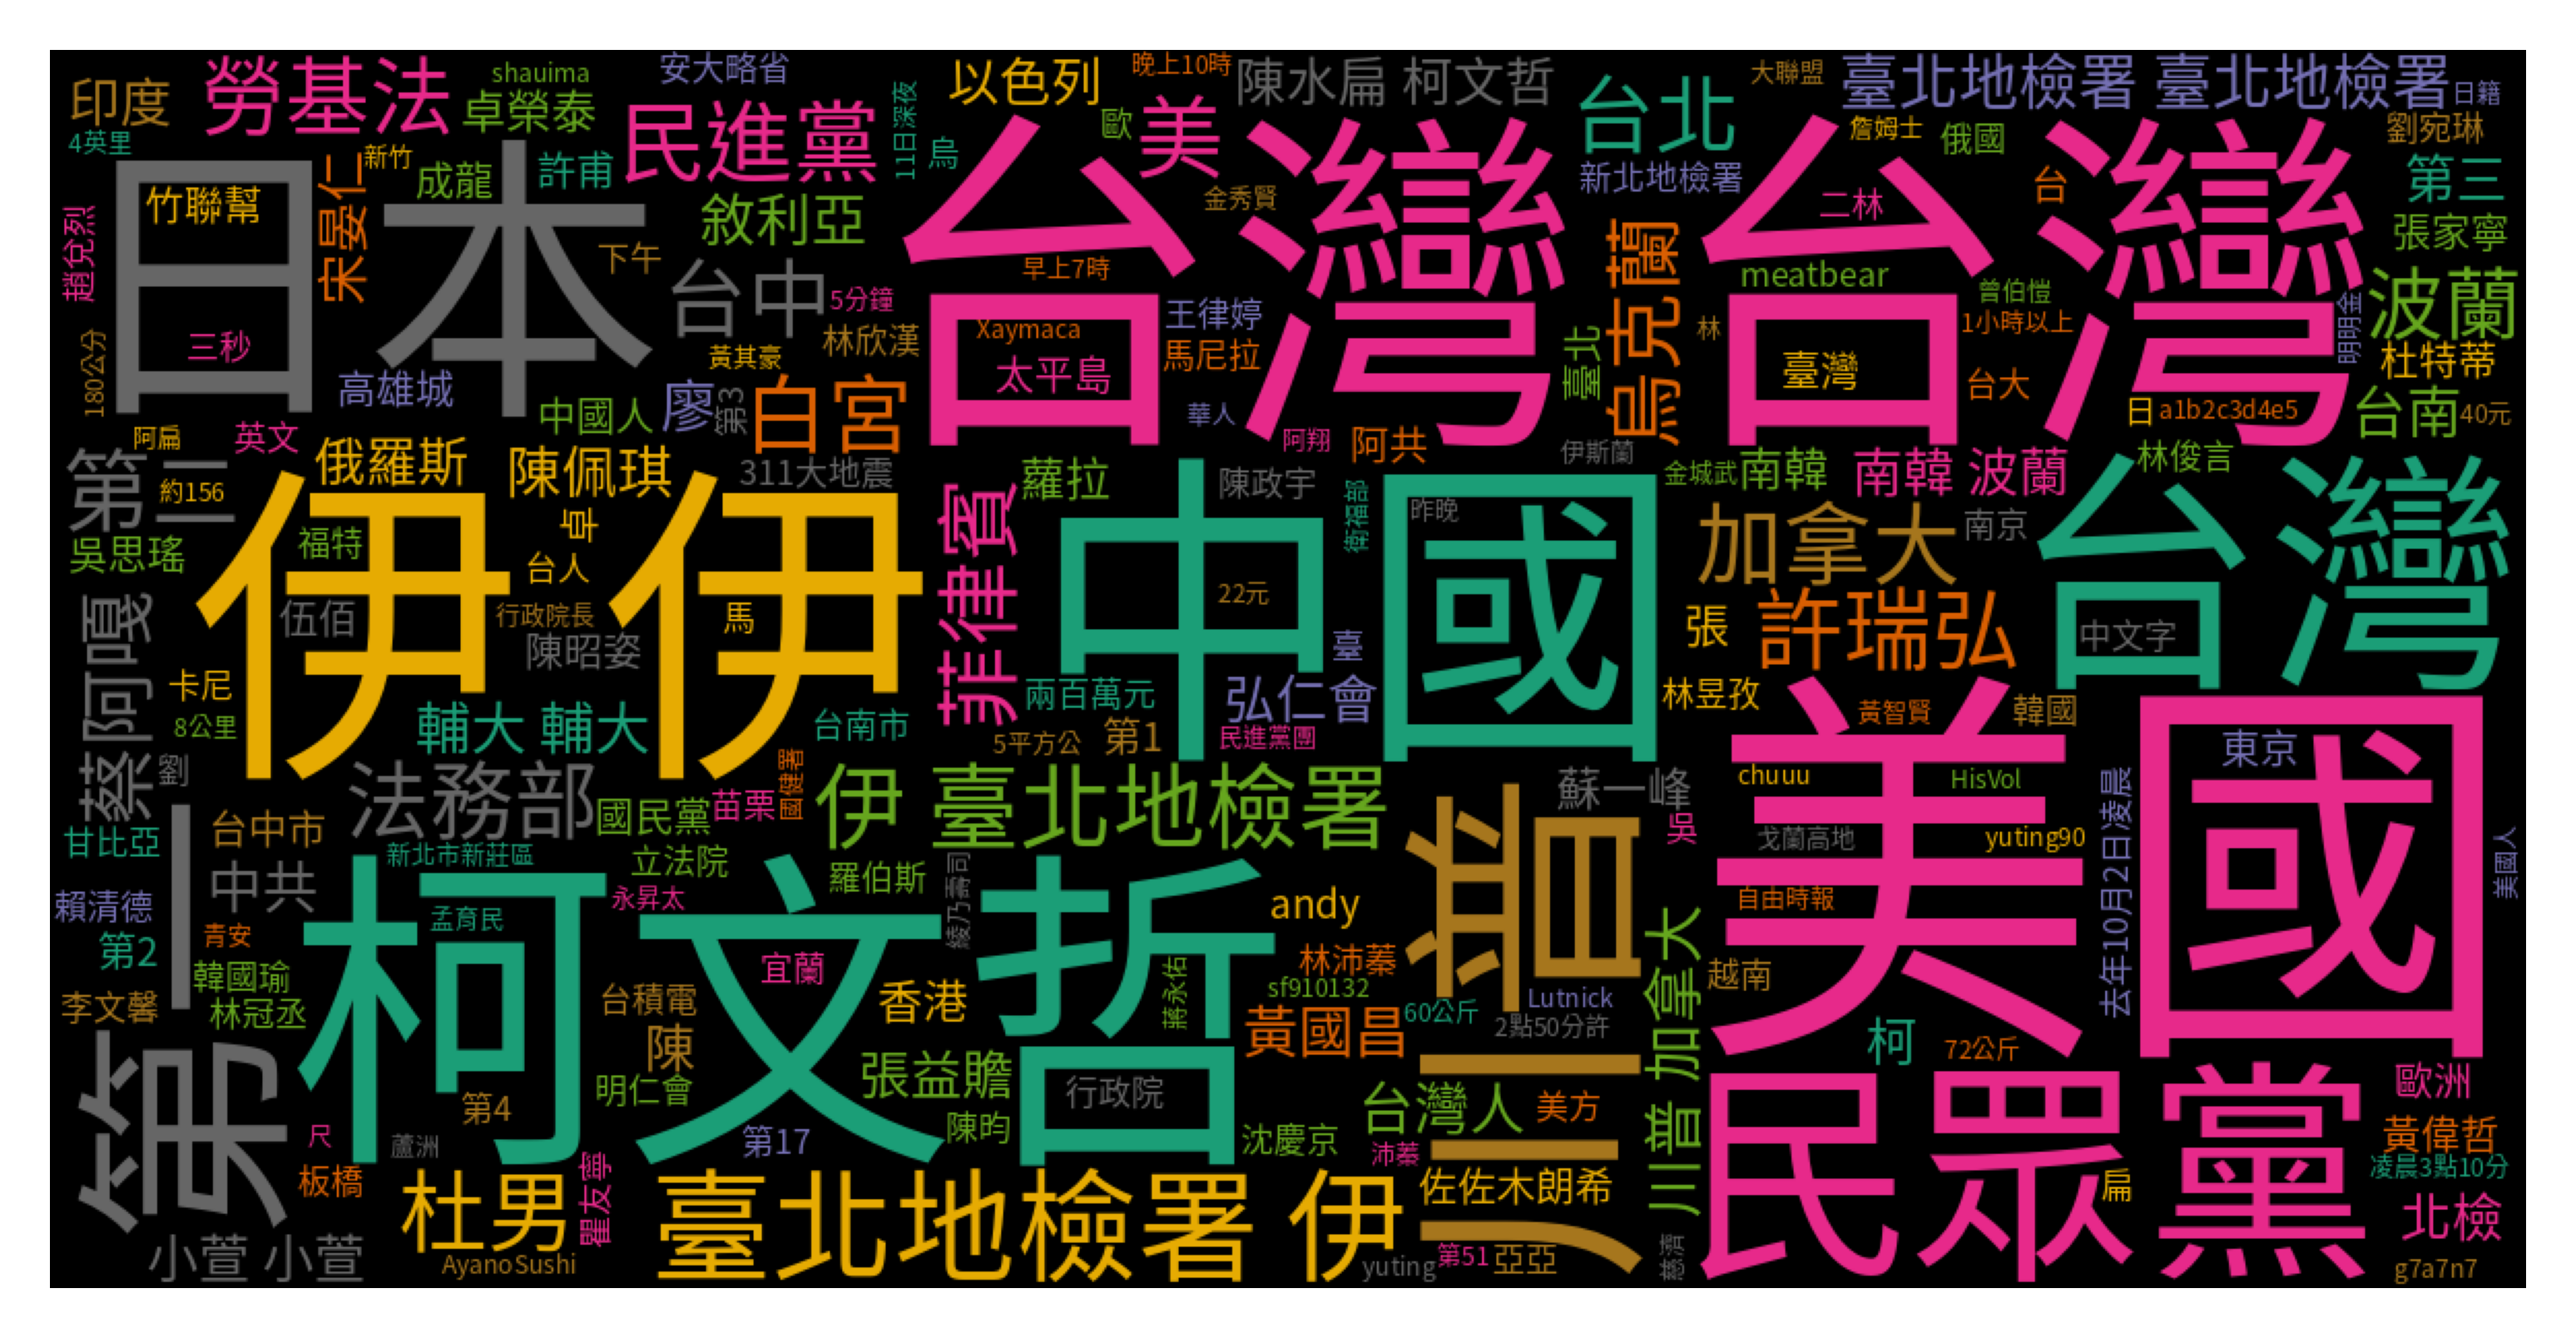

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip"
# !unzip "NotoSansCJKtc-hinted.zip"

text = " ".join(word for word in count_list)
wordcloud = WordCloud(width=1200, height=600, max_font_size=200, max_words=200, background_color="black",
                      font_path='NotoSansCJKtc-Regular.otf', colormap="Dark2").generate(text)
plt.figure(dpi=600)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()